In [1]:
import pandas as pd
import numpy as np
import string
from nltk.stem.snowball import ItalianStemmer

In [24]:
# Dirty work: merging documents 

        # first csv (downloaded by Mic)  # second and third csv (downloaded by Paolo)
allFiles = ['data/raw_data_BACKUP.csv', 'data/raw_data1.csv', 'data/raw_data2.csv']

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

frame = pd.concat(list_, axis = 0, ignore_index = True)

print('first len:', len(frame))
# drop first column 'unnamed: 0'
frame = frame.drop('Unnamed: 0', axis=1)
frame.drop_duplicates(inplace=True)
print('new len:', len(frame))

frame.to_csv('data/raw_data.csv',index_label=False)

first len: 14759
new len: 14596


In [25]:
frame

,title,price,locali,superficie,bagni,piano,description
0,Nuovi Appartamenti e Attici / Mansarde in Vend...,€ 192.000 - € 705.000,1 - 5,46.0,NaN,NaN,\n Le residenze...
1,"Bilocale viale Italo Calvino, Fonte Ostiense, ...",€ 225.000,2,50.0,1,1 \n,\n PAPILLO EUR ...
2,"Quadrilocale via Alessandro Fleming, Fleming, ...",€ 1.350.000,4,200.0,2,2 \n,\n FLEMING - IN...
3,"Quadrilocale via Aosta 45, Re di Roma, Roma",€ 450.000,4,135.0,1,A \n,\n Rif: 18086 -...
4,"Attico / Mansarda largo Arturo Donaggio, Torre...",€ 135.000,2,60.0,1,5 \n,\n Torrevecchia...
5,"Villa via Cristoforo Sabbadino 88, Piana del S...",€ 229.000,5,169.0,3+,NaN,\n a soli € 229...
6,"Bilocale viale delle Medaglie d'Oro 124, Medag...",€ 249.000,2,75.0,1,1 \n,"\n Balduina, ad..."
7,"Villa via Saturnia, San Giovanni, Roma",€ 2.500.000,5+,625.0,3+,NaN,\n A due passi ...
8,"Bilocale via Savona, Villa Fiorelli, Roma",€ 339.000,2,70.0,1,3 \n,\n In Via Savon...
9,"Bilocale via Silicella 17, Tor Tre Teste - Tor...",€ 115.000,2,58.0,1,3 \n,\n Rif: 18028 -...


In [2]:
# price_preprocessing
def price_prep(s):
    
    # removing punctuation and symbols
    s = s.replace('.','')
    s = s.replace('€','')
    s = s.strip(' ')
    s = s.split('-')

    # return first value
    # or the mean between the two
    if len(s) == 1:
        return float(s[0])
    else:
        min_price = float(s[0])
        max_price = float(s[1])
    return (min_price+max_price)/2


# locali preprocessing
def locali_preproc(s):
    s = s.strip()
    s = s.replace('+','')
    return int(s[len(s)-1])



# no need superficie (already float values)

# bagni preproc on place


# piano preprocessing
def piano_preproc(x):
    
    x = str(x)
    x = x.strip()
    
    if x == 'T':
        return 0
    elif x == 'A' or x == '11+':
        return np.nan #return nan
    elif x == 'R':
        return 0.5
    elif x == 'S':
        return -1
#   elif x == '11+':
#      return 11
    else:
        return float(x)


# description preprocessing
def description_preproc(description):

    sp = string.punctuation+'“”–’°•€'
    punctuation_remover = str.maketrans('', '', sp)
    
    description = description.strip()
    description = description.replace("\n", " ")
    description = description.replace('\r', " ")
    
    description = description.split(' ')
    
    # removing punctuation
    description = [ word.translate(punctuation_remover) for word in description ]
    
    #removing empty spaces in the list 
    description = filter(None, description)
    
    # Italian stemmer
    stemmer = ItalianStemmer()
    # stemmed list
    stemmed_list = [stemmer.stem(word) for word in description]
    
    
    return ' '.join(stemmed_list)

In [3]:

# load csv file
df = pd.read_csv('data/raw_data.csv')

# delete rows with na values
df.dropna(inplace=True)


# price prep
df = df[df.price.str.contains('[a-zA-Z]') == False]
df.price = df.price.map(price_prep)
df = df[df.price > 2000 ]

# locali prep
df.locali = df.locali.map(locali_preproc)

# superficie doesn't needs prep

# bagni prep
df.bagni = df.bagni.map(lambda x: int(x[0]))

# piano prep
df.piano = df.piano.map(piano_preproc)

# stemming description
df.description = df.description.map(description_preproc)
#remove na
df.dropna(inplace=True)


KeyboardInterrupt: 

In [36]:
df.to_csv('data/data_preprocessed.csv')

In [37]:
prova = pd.read_csv('data/data_preprocessed.csv')

In [39]:
len(prova)

10332

In [4]:
df = pd.read_csv('data/data_preprocessed.csv', usecols=['price','locali','superficie','bagni','piano'])

In [5]:
df

,price,locali,superficie,bagni,piano
0,225000.0,2,50.0,1,1.0
1,1350000.0,4,200.0,2,2.0
2,135000.0,2,60.0,1,5.0
3,249000.0,2,75.0,1,1.0
4,339000.0,2,70.0,1,3.0
5,115000.0,2,58.0,1,3.0
6,189000.0,4,168.0,3,0.0
7,215000.0,3,67.0,1,1.0
8,279000.0,3,110.0,1,0.0
9,1380000.0,5,140.0,2,2.0


In [14]:
des = df.describe()

In [24]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [25]:
df.head()

,price,locali,superficie,bagni,piano
0,225000.0,2,50.0,1,1.0
1,1350000.0,4,200.0,2,2.0
2,135000.0,2,60.0,1,5.0
3,249000.0,2,75.0,1,1.0
4,339000.0,2,70.0,1,3.0


In [27]:
#mms = StandardScaler() # instead of MinMaxScaler()<- used for cathegorigal stuff!
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)

In [28]:
data_transformed

array([[0.01875974, 0.25      , 0.05429462, 0.        , 0.18181818],
       [0.12016375, 0.75      , 0.2211838 , 0.5       , 0.27272727],
       [0.01064742, 0.25      , 0.06542056, 0.        , 0.54545455],
       ...,
       [0.03182959, 0.5       , 0.0987984 , 0.        , 0.54545455],
       [0.03588575, 0.5       , 0.11659991, 0.        , 0.18181818],
       [0.04805423, 1.        , 0.16555407, 1.        , 0.18181818]])

In [20]:
Sum_of_squared_distances = []
K = range(1,14)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

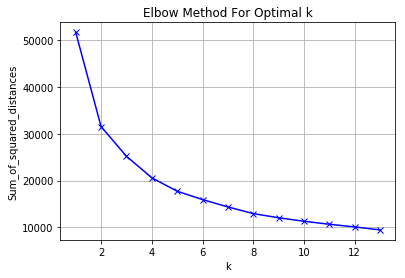

In [21]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In [13]:
Sum_of_squared_distances

[51660.0,
 31526.564421451036,
 25190.841347605732,
 20601.94266246998,
 17723.919144018728,
 15949.64364441437,
 14372.5305455113,
 12966.058250236243,
 11983.408283414063,
 11307.59323758667,
 10641.693880979787,
 10009.860282761458,
 9517.241991931041]

In [63]:
from sklearn.cluster import KMeans

In [69]:
kmeans = KMeans(n_clusters=5, random_state=1234).fit(data_transformed)

In [66]:
kmeans.predict(data_transformed)

array([1, 0, 1, ..., 3, 3, 4], dtype=int32)

In [70]:
kmeans.predict(data_transformed)

array([1, 0, 1, ..., 3, 3, 4], dtype=int32)

array([[1, 2],
       [1, 4],
       [1, 0],
       [4, 2],
       [4, 4],
       [4, 0]])

In [72]:
df.head()

,price,locali,superficie,bagni,piano
0,225000.0,2,50.0,1,1.0
1,1350000.0,4,200.0,2,2.0
2,135000.0,2,60.0,1,5.0
3,249000.0,2,75.0,1,1.0
4,339000.0,2,70.0,1,3.0


In [75]:
kmeans = KMeans(n_clusters=5, random_state=1234).fit(prova)

In [76]:
kmeans.predict(prova)

array([0, 2, 0, ..., 0, 1, 1], dtype=int32)

In [ ]:
df.concat()